In [2]:
# データセット準備
import numpy as npy

# データ生成
views =[95,130,201,165,185,179,153,121,119,223,152,239,198,205,116,100,206,238,242,266,183,122,124,201,203,248,223,207,123]
users =[56,67,154,138,147,133,118,63,73,155,94,191,156,136,83,72,149,163,156,157,140,74,89,103,155,196,157,130,82]
# 1=休日、0=平日
day_of_week=[1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1]

N=len(views)
T2 = npy.zeros((N,2), dtype=npy.uint8)
X=npy.zeros((N,2))

uvlist=npy.zeros(N)

#データの設定
for i in range(N):
    # 1ユーザ当たりのページビュー数
    uperv=round(views[i]/users[i],3)
    uvlist[i]=uperv
    # データの設定（ビュー数、ユーザあたりのページビュー数）
    X[i]=[views[i],uperv]
    
    # 休日[0,1]　平日[1,0]
    if day_of_week[i] == 1:
        T2[i]=[0,1]
    else:
        T2[i]=[1,0]

X_range0=[min(views)*0.9,max(views)*1.1]
X_range1=[min(uvlist)*0.9,max(uvlist)*1.1]

# データをclassdata2.npzファイルに保存する
npy.savez('classdata2.npz',X=X,T2=T2,X_range0=X_range0,X_range1=X_range1,X_n=N)

In [3]:
# データの設定

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('classdata2.npz')
# 入力値の設定
X=sample_data['X']
# クラス（答え）の設定
T2=sample_data['T2']
# アクセス数の表示範囲設定
X_range0=sample_data['X_range0']
# UP値の表示範囲設定
X_range1=sample_data['X_range1']
# データ数の設定
N=sample_data['X_n']

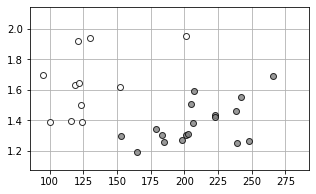

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# データ表示
def show_data2(x,t):
    wk,K = t.shape
    c=[[.5,.5,.5],[1,1,1]]
    for k in range(K):
        # 平日（クラスA）はグレー表示、休日（クラスB）は白抜き表示
        plt.plot(x[t[:, k]==1,0],x[t[:, k]==1,1],linestyle='none',markeredgecolor='black',marker='o',color=c[k],alpha=0.8)
    plt.grid(True)
    
plt.figure(figsize=(5,3))
plt.subplots_adjust(wspace=0.5)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

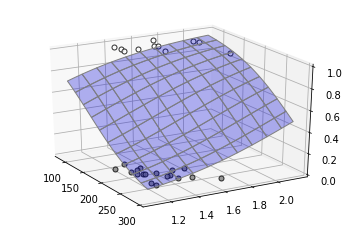

In [5]:
# 3D曲面の描画
from mpl_toolkits.mplot3d import axes3d

# ロジスティック回帰モデル
def logistic2(x0,x1,w):
    y=1/(1+npy.exp(-(w[0]*x0+w[1]*x1+w[2])))
    return y
# 3D曲面の描画
def show3d_logistic2(ax, w):
    xn=50
    x0=npy.linspace(X_range0[0],X_range0[1],xn)
    x1=npy.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = npy.meshgrid(x0,x1)
    y=logistic2(xx0,xx1,w)
    ax.plot_surface(xx0,xx1,y,color='blue',edgecolor='gray',rstride=5,cstride=5,alpha=0.3)
# 3Dにデータをプロット
def show_data2_3d(ax,x,t):
    c = [[.5,.5,.5],[1,1,1]]
    for i in range(2):
        ax.plot(x[t[:,i] == 1,0],x[t[:,i] == 1,1],i,marker='o',color=c[i],markeredgecolor='black',linestyle='none',markersize=5,alpha=0.8)
        ax.view_init(elev=25,azim=-30)
        
Ax=plt.subplot(1,1,1,projection='3d')
W=[-0.0155,2.1,-0.01]
show3d_logistic2(Ax,W)
show_data2_3d(Ax,X,T2)
plt.show()


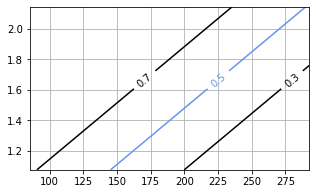

In [6]:
# 等高線表示
def show_contour_logistic2(w):
    xn = 30
    x0=npy.linspace(X_range0[0],X_range0[1],xn)
    x1=npy.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = npy.meshgrid(x0,x1)
    y=logistic2(xx0,xx1,w)
    cont=plt.contour(xx0,xx1,y,levels=(0.3,0.5,0.7),colors=['k','cornflowerblue','k'])
    cont.clabel(fmt='%.1f',fontsize=10)
    plt.grid(True)

plt.figure(figsize=(5,3))
W=[-0.0155,2.1,-0.01]
show_contour_logistic2(W)
plt.show()

In [8]:
# 交差エントロピー誤差
def cee_logistic2(w,x,t):
    X_n=x.shape[0]
    y=logistic2(x[:,0],x[:,1],w)
    cee = 0
    for n in range(len(y)):
        cee = cee -(t[n,0]*npy.log(y[n])+(1-t[n,0])*npy.log(1-y[n]))
    cee = cee/X_n
    return cee

# 交差エントロピー誤差の微分
def dcee_logistic2(w,x,t):
    X_n=x.shape[0]
    y=logistic2(x[:,0],x[:,1],w)
    dcee = npy.zeros(3)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n,0])*x[n,0]
        dcee[1]=dcee[1]+(y[n]-t[n,0])*x[n,1]
        dcee[2]=dcee[2]+(y[n]-t[n,0])
    dcee = dcee/X_n
    return dcee

W=[-0.0155,2.1,-0.01]
cee = cee_logistic2(W,X,T2)
dcee = dcee_logistic2(W,X,T2)
print(cee)
print(dcee)

1.1993706246295033
[-3.85053356e+01  3.64972880e-03 -5.74924284e-02]


C:\Users\wanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\wanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
C:\Users\wanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\wanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


w0=-0.01,w1=1.000602,w2=-0.009564
CEE=0.975249


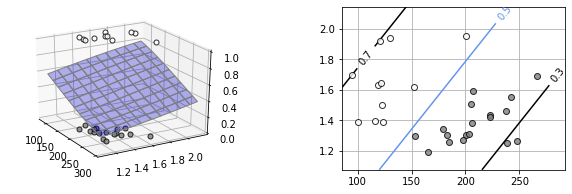

In [7]:
from scipy.optimize import minimize

# 交差エントロピー誤差
def cee_logistic2(w,x,t):
    X_n=x.shape[0]
    y=logistic2(x[:,0],x[:,1],w)
    cee = 0
    for n in range(len(y)):
        cee = cee -(t[n,0]*npy.log(y[n])+(1-t[n,0])*npy.log(1-y[n]))
    cee = cee/X_n
    return cee

# 交差エントロピー誤差の微分
def dcee_logistic2(w,x,t):
    X_n=x.shape[0]
    y=logistic2(x[:,0],x[:,1],w)
    dcee = npy.zeros(3)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n,0])*x[n,0]
        dcee[1]=dcee[1]+(y[n]-t[n,0])*x[n,1]
        dcee[2]=dcee[2]+(y[n]-t[n,0])
    dcee = dcee/X_n
    return dcee

# ロジスティック回帰モデルのパラメータサーチ
def fit_logistic2(w_init,x,t):
    res=minimize(cee_logistic2,w_init,args=(x,t),jac=dcee_logistic2,method="CG")
    return res.x

plt.figure(1,figsize=(10,3))
plt.subplots_adjust(wspace=0.5)

Ax=plt.subplot(1,2,1,projection='3d')
W_init =[-0.10,1,-0.01]
W =fit_logistic2(W_init,X,T2)
print("w0={0:.2f},w1={1:2f},w2={2:2f}".format(W[0],W[1],W[2]))
show3d_logistic2(Ax,W)
show_data2_3d(Ax,X,T2)
cee = cee_logistic2(W,X,T2)
print("CEE={0:2f}".format(cee))

Ax=plt.subplot(1,2,2)
show_data2(X,T2)
show_contour_logistic2(W)
plt.show()


0.5259515412317335


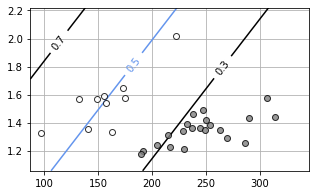

In [27]:
# 別の月の検証データ
import numpy as npy

# データ生成
views =[97,238,229,254,237,250,156,149,244,249,230,263,247,132,173,306,215,269,314,157,222,175,192,190,286,205,232,163,141,217,290]
users =[73,163,171,184,174,176,98,95,179,185,190,195,166,84,105,194,164,208,218,102,110,111,160,162,228,165,167,122,104,177,202]

# 1=休日、0=平日
day_of_week=[1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0]

N=len(views)
T2 = npy.zeros((N,2), dtype=npy.uint8)
X=npy.zeros((N,2))

uvlist=npy.zeros(N)

#データの設定
for i in range(N):
    # 1ユーザ当たりのページビュー数
    uperv=round(views[i]/users[i],3)
    uvlist[i]=uperv
    # データの設定（ビュー数、ユーザあたりのページビュー数）
    X[i]=[views[i],uperv]
    
    # 休日[0,1]　平日[1,0]
    if day_of_week[i] == 1:
        T2[i]=[0,1]
    else:
        T2[i]=[1,0]

X_range0=[min(views)*0.9,max(views)*1.1]
X_range1=[min(uvlist)*0.9,max(uvlist)*1.1]

# データをclassdata2.npzファイルに保存する
npy.savez('classdata2-1.npz',X=X,T2=T2,X_range0=X_range0,X_range1=X_range1,X_n=N)
# データの設定

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('classdata2-1.npz')
# 入力値の設定
X=sample_data['X']
# クラス（答え）の設定
T2=sample_data['T2']
# アクセス数の表示範囲設定
X_range0=sample_data['X_range0']
# UP値の表示範囲設定
X_range1=sample_data['X_range1']
# データ数の設定
N=sample_data['X_n']

plt.figure(figsize=(5,3))
show_data2(X,T2)
W=[-0.01,1.000602,--0.009564]
show_contour_logistic2(W)
plt.show()